In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

In [17]:
#Ici on définit une classe Kmeans, chaque objet de cette classe aura les attributs learning_rate, centroids.

class KMeans:
    def __init__(self,centroids,learning_rate,number_groups):
        self.__centroids=centroids.copy()
        self.__learning_rate=learning_rate
        self.__number_groups=number_groups
    
    def get_centroids(self):
        return self.__centroids
    
    def get_learning_rate(self):
        return self.__learning_rate
    
    def get_number_groups(self):
        return self.__number_groups
    
    def set_centroids(self,new_centroids):
        self.__centroids = new_centroids.copy()
        
    def set_learning_rate(self,new_learning_rate):
        self.__learning_rate=new_learning_rate

        #Cette méthode permet de créer les groupes à partir des centroids du Kmeans.

    def make_groups(self,data):
        repertory=np.zeros(data.shape[0])
        K=self.get_number_groups()
        min=np.zeros((np.shape(data)[0],K))
        
        #Ici on crée un tableau qui va contenir en indice (i,j) le ième point de notre data set
        #moins le j ième centroid.
        for j in range(K):
            min[:,j]=np.linalg.norm(data-self.get_centroids()[j,:],axis=1)#A chaque ligne on applique la norme euclidienne.
        
        repertory=np.argmin(min,axis=1)#On récupère l'indice de la plus petite norme de chaque ligne 
        #afin de savoir dans quels groupes classer le point.
        
        return repertory
#Cette méthode permet de faire 1 pas dans la descente de gradient stochastique
    def update(self, data):
        copy_data=data.copy()
        K=self.get_number_groups()
        current_centroids=self.get_centroids()
        
        #Ici on recrée le même type de tableau que dans make_groups afin de savoir de quels centroids notre exemple est 
        #le plus proche

        min=np.zeros((np.shape(data)[0],K))
        
        for j in range(K):
            min[:,j]=np.linalg.norm(data-current_centroids[j,:])
        
        indice_nearest_centroid=np.argmin(min)#On récupère l'indice du centroid le plus proche ici
        #Ici on fait la descente de gradient indiqué dans le document fournit
        updated_centroid = current_centroids[indice_nearest_centroid] + self.get_learning_rate()*(data-current_centroids[indice_nearest_centroid])
        #Une fois le centroid modifié on met à jour les centroids
        current_centroids[indice_nearest_centroid] = updated_centroid
        self.set_centroids(current_centroids)
    
    def update_batch(self,data,t):
        copy_data=data[:t].copy()
        K=self.get_number_groups()
        current_centroids=self.get_centroids()
        
        min=np.zeros((np.shape(copy_data)[0],K))
        
        for j in range(K):
            min[:,j]=np.linalg.norm(copy_data-current_centroids[j,:],axis=1)
           
        indice_nearest_centroid=np.argmin(min,axis=1)
        somme_gradient = np.zeros((3,2))
        
        for i in range(copy_data.shape[0]) :
            if indice_nearest_centroid[i]==0:
                 somme_gradient[0] = somme_gradient[0]+copy_data[i]-current_centroids[0] 
            elif indice_nearest_centroid[i]==1:
                 somme_gradient[1] = somme_gradient[1]+copy_data[i]-current_centroids[1] 
            else : 
                somme_gradient[2] = somme_gradient[2]+copy_data[i]-current_centroids[2] 
                
        self.set_centroids(current_centroids+self.get_learning_rate()*(somme_gradient/copy_data.shape[0]))
        
        

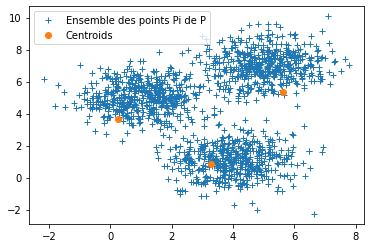

In [202]:
rng = npr.default_rng(100)

#Ici on crée un nuage de points pour tester notre algorithme
u = np.array([1,5])+npr.randn(500,2)
v = np.array([4,1])+npr.randn(500,2)
w = np.array([5,7])+npr.randn(500,2)
P=np.concatenate((u,v,w),axis=0)
#On choisit 3 points au hasard dans le data set
random_example=P[[int(npr.uniform(0,500)),int(npr.uniform(500,1000)),int(npr.uniform(1000,1500))]]
#On affiche le nuage de points qu'on vient de créer ainsi que les centroids qui ont été choisi
npr.shuffle(P)
plt.plot(P[:,0],P[:,1],'+')
plt.plot(random_example[:,0],random_example[:,1],'o')
plt.legend(['Ensemble des points Pi de P','Centroids'])
plt.show()

In [203]:
#Ici on définit la fonction qui va entrainer notre Kmeans.

def training_sto(Kmeans,data, iter=1000):
    #D'abord on crée un tableau de valeurs aléatoires tirées de façon uniforme entre 0 et le nombre de data dans le data set.
    valeur_cost=[]
    k=1
    t=npr.uniform(0,data.shape[0],iter).astype(int)
    #Ici on va update nos centroides en faisant la descente de gradient sur les data qui ont été tirés aléatoirement
    for j in t:
        somme=0
        Kmeans.update(P[j])
        k+=1
        Kmeans.set_learning_rate(1/k)
        G=Kmeans.make_groups(data)
        #On évalue la fonction de cout
        for i in range(G.shape[0]):
            if G[i]==0:
                somme+=np.linalg.norm(data[i]-Kmeans.get_centroids()[0])**2
            elif G[i]==1:
                somme+=np.linalg.norm(data[i]-Kmeans.get_centroids()[1])**2
            else:
                 somme+=np.linalg.norm(data[i]-Kmeans.get_centroids()[2])**2
        valeur_cost.append(somme/data.shape[0])
    return valeur_cost

def training_batch(Kmeans,data, iter=1000,t=1500):
    #D'abord on crée un tableau de valeurs aléatoires tirées de façon uniforme entre 0 et le nombre de data dans le data set.
    valeur_cost=[]
    k=1
    #Ici on va update nos centroides en faisant la descente de gradient sur les data qui ont été tirés aléatoirement
    for j in range(iter):
        somme=0
        Kmeans.update_batch(P,t)
        k+=1
        #Kmeans.set_learning_rate(1/k)
        G=Kmeans.make_groups(data)
        #On évalue la fonction de cout
        for i in range(G.shape[0]):
            if G[i]==0:
                somme+=np.linalg.norm(data[i]-Kmeans.get_centroids()[0])**2
            elif G[i]==1:
                somme+=np.linalg.norm(data[i]-Kmeans.get_centroids()[1])**2
            else:
                 somme+=np.linalg.norm(data[i]-Kmeans.get_centroids()[2])**2
        valeur_cost.append(somme/data.shape[0])
    return valeur_cost

In [204]:
#On crée un Kmeans de 3 groupes et on l'entraîne
test_Kmeans_sto = KMeans(random_example,1,3)
x_sto=training_sto(test_Kmeans_sto,P)

In [205]:
test_Kmeans_batch_1500 = KMeans(random_example,0.05,3)
x_batch_1500=training_batch(test_Kmeans_batch_1500,P,t=1500)

test_Kmeans_batch_10 = KMeans(random_example,0.005,3)
x_batch_10=training_batch(test_Kmeans_batch_10,P,t=10)

test_Kmeans_batch_100 = KMeans(random_example,0.005,3)
x_batch_100=training_batch(test_Kmeans_batch_100,P,t=100)

test_Kmeans_batch_500 = KMeans(random_example,0.05,3)
x_batch_500=training_batch(test_Kmeans_batch_500,P,t=500)


In [206]:
#On crée les groupes
G_sto=test_Kmeans_sto.make_groups(P)
G_1500=test_Kmeans_batch_1500.make_groups(P)
G_10=test_Kmeans_batch_10.make_groups(P)
G_100=test_Kmeans_batch_100.make_groups(P)
G_500=test_Kmeans_batch_500.make_groups(P)


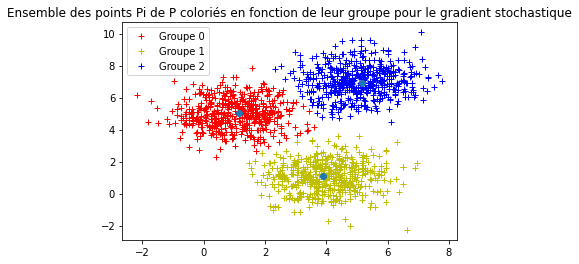

In [207]:
P_0=P[G_sto==0]
P_1=P[G_sto==1]
P_2=P[G_sto==2]

#Ici on plot les points de chaque groupe.
plt.plot(P_0[:,0],P_0[:,1],'r+',P_1[:,0],P_1[:,1],'y+',P_2[:,0],P_2[:,1],'b+')
plt.plot(test_Kmeans_sto.get_centroids()[:,0],test_Kmeans_sto.get_centroids()[:,1],'o')
plt.legend(['Groupe 0', 'Groupe 1', 'Groupe 2'])
plt.title('Ensemble des points Pi de P coloriés en fonction de leur groupe pour le gradient stochastique')
plt.show()

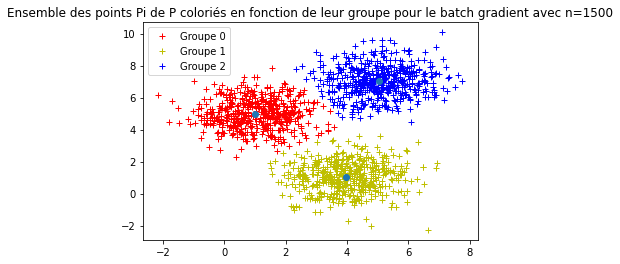

In [208]:
P_0=P[G_1500==0]
P_1=P[G_1500==1]
P_2=P[G_1500==2]

#Ici on plot les points de chaque groupe.
plt.plot(P_0[:,0],P_0[:,1],'r+',P_1[:,0],P_1[:,1],'y+',P_2[:,0],P_2[:,1],'b+')
plt.plot(test_Kmeans_batch_1500.get_centroids()[:,0],test_Kmeans_batch_1500.get_centroids()[:,1],'o')
plt.legend(['Groupe 0', 'Groupe 1', 'Groupe 2'])
plt.title('Ensemble des points Pi de P coloriés en fonction de leur groupe pour le batch gradient avec n=1500')
plt.show()

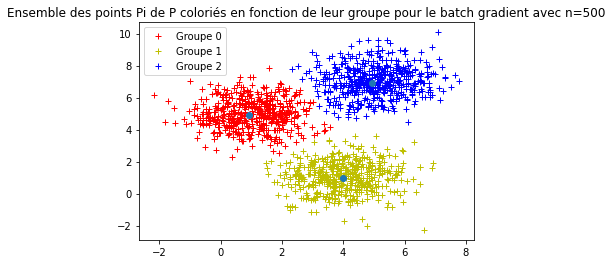

In [209]:
P_0=P[G_500==0]
P_1=P[G_500==1]
P_2=P[G_500==2]

#Ici on plot les points de chaque groupe.
plt.plot(P_0[:,0],P_0[:,1],'r+',P_1[:,0],P_1[:,1],'y+',P_2[:,0],P_2[:,1],'b+')
plt.plot(test_Kmeans_batch_500.get_centroids()[:,0],test_Kmeans_batch_500.get_centroids()[:,1],'o')
plt.legend(['Groupe 0', 'Groupe 1', 'Groupe 2'])
plt.title('Ensemble des points Pi de P coloriés en fonction de leur groupe pour le batch gradient avec n=500')
plt.show()

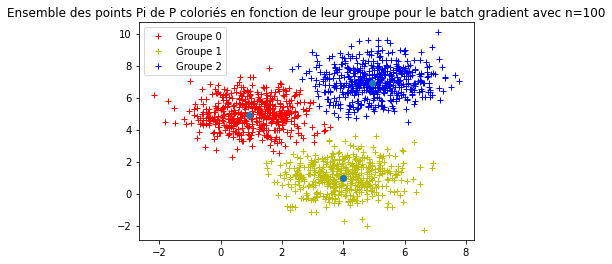

In [210]:
P_0=P[G_100==0]
P_1=P[G_100==1]
P_2=P[G_100==2]

#Ici on plot les points de chaque groupe.
plt.plot(P_0[:,0],P_0[:,1],'r+',P_1[:,0],P_1[:,1],'y+',P_2[:,0],P_2[:,1],'b+')
plt.plot(test_Kmeans_batch_500.get_centroids()[:,0],test_Kmeans_batch_500.get_centroids()[:,1],'o')
plt.legend(['Groupe 0', 'Groupe 1', 'Groupe 2'])
plt.title('Ensemble des points Pi de P coloriés en fonction de leur groupe pour le batch gradient avec n=100')
plt.show()

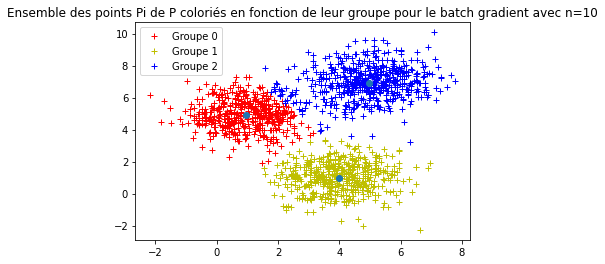

In [211]:
P_0=P[G_10==0]
P_1=P[G_10==1]
P_2=P[G_10==2]

#Ici on plot les points de chaque groupe.
plt.plot(P_0[:,0],P_0[:,1],'r+',P_1[:,0],P_1[:,1],'y+',P_2[:,0],P_2[:,1],'b+')
plt.plot(test_Kmeans_batch_500.get_centroids()[:,0],test_Kmeans_batch_500.get_centroids()[:,1],'o')
plt.legend(['Groupe 0', 'Groupe 1', 'Groupe 2'])
plt.title('Ensemble des points Pi de P coloriés en fonction de leur groupe pour le batch gradient avec n=10')
plt.show()

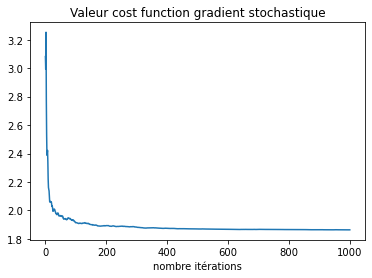

In [212]:
plt.title("Valeur cost function gradient stochastique")
plt.xlabel("nombre itérations")
plt.plot(x_sto)

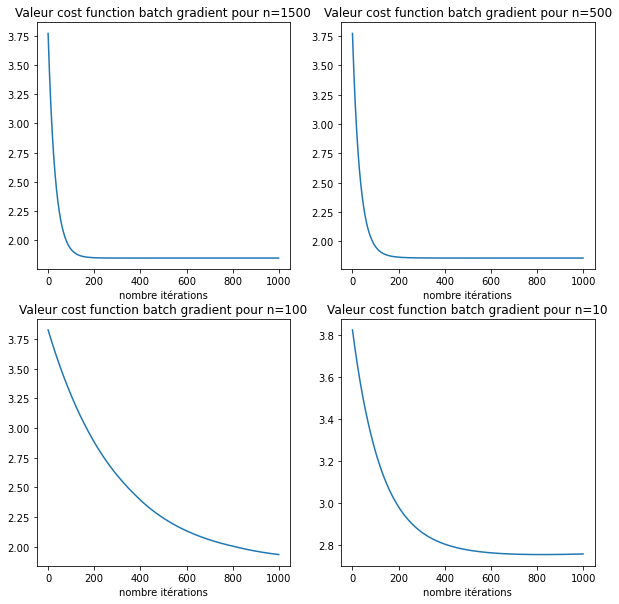

In [213]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Valeur cost function batch gradient pour n=1500")
plt.xlabel("nombre itérations")
plt.plot(x_batch_1500)
plt.subplot(2,2,2)
plt.title("Valeur cost function batch gradient pour n=500")
plt.xlabel("nombre itérations")
plt.plot(x_batch_500)
plt.subplot(2,2,3)
plt.title("Valeur cost function batch gradient pour n=100")
plt.xlabel("nombre itérations")
plt.plot(x_batch_100)
plt.subplot(2,2,4)
plt.title("Valeur cost function batch gradient pour n=10")
plt.xlabel("nombre itérations")
plt.plot(x_batch_10)